<p style="font-weight:600; font-size:30px; color:yellow; padding-left:8px;">
    <b>Data Preprocessing</b>
</p>

<h2 style="color:cyan; font-weight:bold;">📑 Table of Contents</h2>

<ol style="font-size:18px; line-height:1.8; color:white;">
  <li><a href="#1-libraries" style="text-decoration:none; color:yellow;">Libraries</a></li>
  <li><a href="#2-data-ingestion" style="text-decoration:none; color:yellow;">Data Ingestion</a></li>
  <li><a href="#3-encoding-categorical-columns" style="text-decoration:none; color:yellow;">Encoding Categorical Columns</a></li>
  <li><a href="#4-data-visualization-before-scaling" style="text-decoration:none; color:yellow;">Data Visualization Before Scaling</a></li>   
  <li><a href="#5-scaling" style="text-decoration:none; color:yellow;">Scaling</a></li>  
  <li><a href="#6-data-visualization-after-scaling" style="text-decoration:none; color:yellow;">Data Visualization After Scaling</a></li>  
</ol>

</ol>

</ol>
</li>   
</ol>


<a id="1-libraries"></a>
<h2 style="color:#FF7700; font-weight:700; font-size:22px;">1. Libraries</h2>



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

<a id="2-data-ingestion"></a>
<h2 style="color:#FFD500; font-weight:700; font-size:22px;">2. Data Ingestion</h2>


In [2]:
df = pd.read_csv('Cleaned_Dataset.csv')
df

,Gender,Age,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP,Quality_of_Sleep
0,Male,27,6.1,42,6,Overweight,77,4200,Normal,126,126,6
1,Male,28,6.2,60,8,Normal,75,10000,Normal,125,125,6
2,Male,28,6.2,60,8,Normal,75,10000,Normal,125,125,6
3,Male,28,5.9,30,8,Obese,85,3000,Sleep Apnea,140,140,4
4,Male,28,5.9,30,8,Obese,85,3000,Sleep Apnea,140,140,4
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,8.1,75,3,Overweight,68,7000,Sleep Apnea,140,140,9
370,Female,59,8.0,75,3,Overweight,68,7000,Sleep Apnea,140,140,9
371,Female,59,8.1,75,3,Overweight,68,7000,Sleep Apnea,140,140,9
372,Female,59,8.1,75,3,Overweight,68,7000,Sleep Apnea,140,140,9


<a id="3-encoding-categorical-columns"></a>
<h2 style="color:#FFD500; font-weight:700; font-size:22px;">3. Encoding Categorical Columns</h2>


In [3]:
categorical_cols = df.select_dtypes(include='object').columns.to_list()
categorical_cols

['Gender', 'BMI Category', 'Sleep Disorder']

In [4]:
data = df.copy()
data

,Gender,Age,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP,Quality_of_Sleep
0,Male,27,6.1,42,6,Overweight,77,4200,Normal,126,126,6
1,Male,28,6.2,60,8,Normal,75,10000,Normal,125,125,6
2,Male,28,6.2,60,8,Normal,75,10000,Normal,125,125,6
3,Male,28,5.9,30,8,Obese,85,3000,Sleep Apnea,140,140,4
4,Male,28,5.9,30,8,Obese,85,3000,Sleep Apnea,140,140,4
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,8.1,75,3,Overweight,68,7000,Sleep Apnea,140,140,9
370,Female,59,8.0,75,3,Overweight,68,7000,Sleep Apnea,140,140,9
371,Female,59,8.1,75,3,Overweight,68,7000,Sleep Apnea,140,140,9
372,Female,59,8.1,75,3,Overweight,68,7000,Sleep Apnea,140,140,9


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

print("Label Encoding done!")

for col in categorical_cols:
    print(data[col].value_counts())

for col in categorical_cols:
    print(df[col].value_counts())

Label Encoding done!
Gender
1    189
0    185
Name: count, dtype: int64
BMI Category
0    195
3    148
1     21
2     10
Name: count, dtype: int64
Sleep Disorder
1    219
2     78
0     77
Name: count, dtype: int64
Gender
Male      189
Female    185
Name: count, dtype: int64
BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64
Sleep Disorder
Normal         219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


In [6]:
gender_maper = {
    1 : 'Male',
    0 : 'Female'
}
bmi_maper = {
    0 : 'Normal',
    2 : 'Overweight',    
    1 : 'Obese',    
    3 : 'Underweight'    
}
sleep_disorder_maper = {
    1 : 'Normal',         
    0 : 'Insomnia',        
    2 : 'Sleep Apnea'
}

In [7]:
# Converting Dictionary into DataFrame

gender_df = pd.DataFrame(list(gender_maper.items()), columns=["Encoded", "Gender"])
bmi_df = pd.DataFrame(list(bmi_maper.items()), columns=['Encoded', 'BMI_type'])
sleep_disorder_df = pd.DataFrame(list(sleep_disorder_maper.items()), columns=['Encoded', 'Sleep_disorder'])

In [8]:
# Converting DataFrame into .csv files for future use

gender_df.to_csv('Gender_encoded.csv', index=False)
bmi_df.to_csv('BMI_encoded.csv', index=False)
sleep_disorder_df.to_csv('Sleep_disorder_encoded.csv', index=False)

<a id="4-data-visualization-before-scaling"></a>
<h2 style="color:#FFD700; font-weight:700; font-size:22px;">4. Data Visualization Before Scaling</h2>


In [9]:
data.head()

,Gender,Age,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP,Quality_of_Sleep
0,1,27,6.1,42,6,3,77,4200,1,126,126,6
1,1,28,6.2,60,8,0,75,10000,1,125,125,6
2,1,28,6.2,60,8,0,75,10000,1,125,125,6
3,1,28,5.9,30,8,2,85,3000,2,140,140,4
4,1,28,5.9,30,8,2,85,3000,2,140,140,4


In [10]:
numerical_cols = list(df.select_dtypes(include='number').columns)
numerical_cols

['Age',
 'Sleep Duration',
 'Physical Activity Level',
 'Stress Level',
 'Heart Rate',
 'Daily Steps',
 'Systolic_BP',
 'Diastolic_BP',
 'Quality_of_Sleep']

In [11]:
# Target is removed from numerical columns
numerical_cols = numerical_cols[:-1]
numerical_cols

['Age',
 'Sleep Duration',
 'Physical Activity Level',
 'Stress Level',
 'Heart Rate',
 'Daily Steps',
 'Systolic_BP',
 'Diastolic_BP']

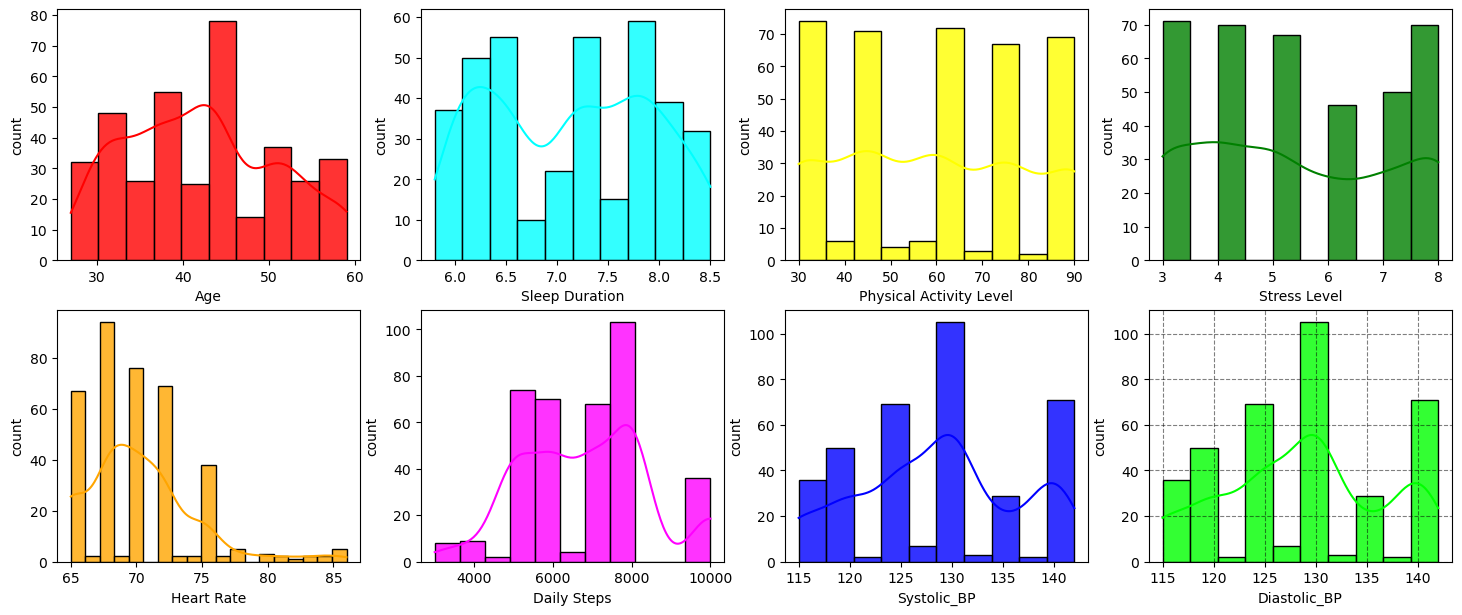

In [12]:
colors = ['red', 'cyan', 'yellow', 'green', 'orange', 'magenta', 'blue', 'lime']

plt.figure(figsize=(18,15))

for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(data[col], kde=True,color=colors[i], label=f"{col}", alpha=0.8)
    plt.xlabel(f"{col}")
    plt.ylabel("count")

plt.grid(color='black', linestyle='--', alpha=0.5)
plt.show()

<a id="5-scaling"></a>
<h2 style="color:#FFD700; font-weight:700; font-size:22px;">5. Scaling</h2>


In [13]:
import joblib
from sklearn.preprocessing import StandardScaler

numerical_cols = ['Age', 'Sleep Duration', 'Physical Activity Level',
                  'Stress Level', 'Heart Rate', 'Daily Steps',
                  'Systolic_BP', 'Diastolic_BP']

# Dictionary to store scalers
scalers = {}

# Scale each column individually and save its scaler
for col in numerical_cols:
    sc = StandardScaler()
    data[col] = sc.fit_transform(data[[col]])  # scale inplace
    scalers[col] = sc                          # keep scaler for later

# Save the dictionary of scalers
joblib.dump(scalers, "scaler.pkl")

print("✅ Per-column scalers saved successfully in scaler.pkl")

data

✅ Per-column scalers saved successfully in scaler.pkl


,Gender,Age,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP,Quality_of_Sleep
0,1,-1.753096,-1.298887,-0.825418,0.347021,3,1.654719,-1.619584,1,-0.330002,-0.330002,6
1,1,-1.637643,-1.173036,0.039844,1.475592,0,1.170474,1.970077,1,-0.459239,-0.459239,6
2,1,-1.637643,-1.173036,0.039844,1.475592,0,1.170474,1.970077,1,-0.459239,-0.459239,6
3,1,-1.637643,-1.550588,-1.402260,1.475592,2,3.591698,-2.362273,2,1.479309,1.479309,4
4,1,-1.637643,-1.550588,-1.402260,1.475592,2,3.591698,-2.362273,2,1.479309,1.479309,4
...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,1.941401,1.218127,0.760896,-1.345836,3,-0.524383,0.113356,2,1.479309,1.479309,9
370,0,1.941401,1.092276,0.760896,-1.345836,3,-0.524383,0.113356,2,1.479309,1.479309,9
371,0,1.941401,1.218127,0.760896,-1.345836,3,-0.524383,0.113356,2,1.479309,1.479309,9
372,0,1.941401,1.218127,0.760896,-1.345836,3,-0.524383,0.113356,2,1.479309,1.479309,9


<a id="6-data-visualization-after-scaling"></a>
<h2 style="color:#FFD700; font-weight:700; font-size:22px;">6. Data Visualization After Scaling</h2>


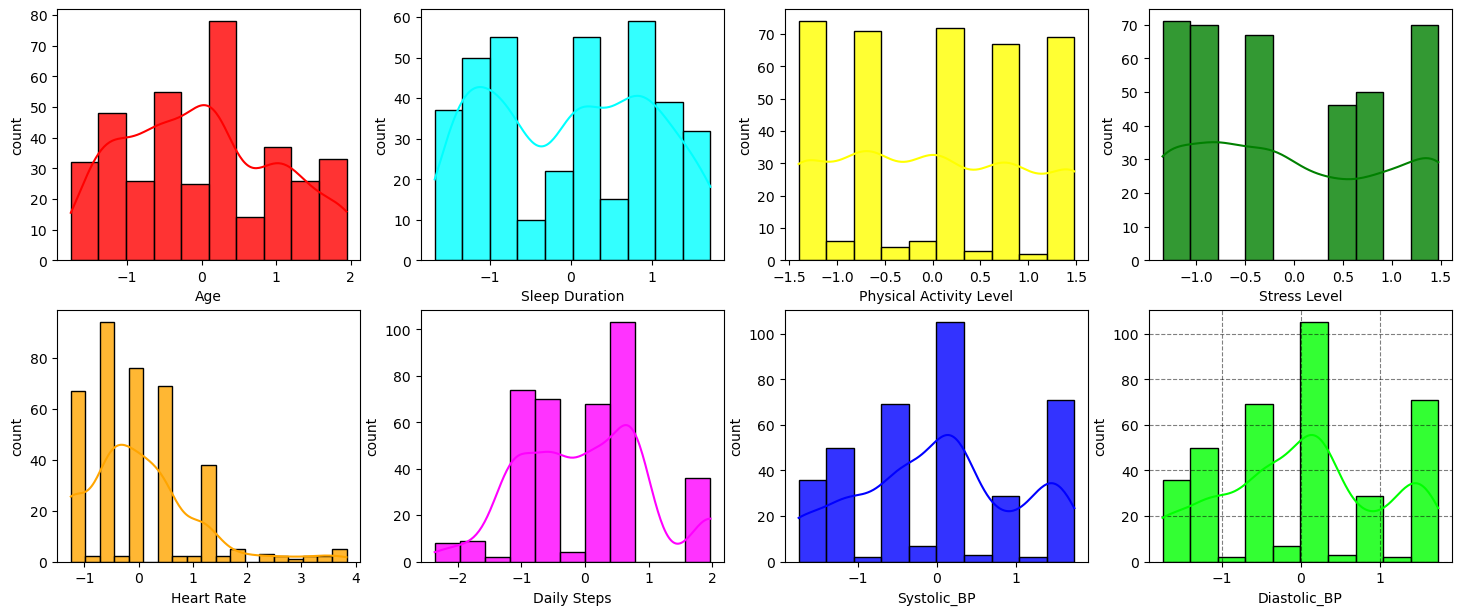

In [14]:
colors = ['red', 'cyan', 'yellow', 'green', 'orange', 'magenta', 'blue', 'lime']

plt.figure(figsize=(18,15))

for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(data[col], kde=True,color=colors[i], label=f"{col}", alpha=0.8)
    plt.xlabel(f"{col}")
    plt.ylabel("count")

plt.grid(color='black', linestyle='--', alpha=0.5)
plt.show()

In [15]:
# save scaled dataset as csv file

data.to_csv('Scaled_Cleaned_Dataset.csv', index=False)
print("Scaled Dataset saved for ML Model training!")

Scaled Dataset saved for ML Model training!


In [16]:
data['Quality_of_Sleep'].value_counts()

Quality_of_Sleep
8    109
6    105
7     77
9     71
5      7
4      5
Name: count, dtype: int64